<a href="https://colab.research.google.com/github/kotharisanjana/CMPE258_DeepLearning_Spring2023/blob/main/Assignment_3/b_NN_Torch_withoutusingbuiltin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Write a colab in pytorch from scratch - 3 layer deep neural network for non linear regression without using pytorch builtin layer functionality.**

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.optim as optim
from typing import Callable

In [2]:
# Generate non-linear data

n = 500
dim = 3
x = torch.rand(n, dim).float()
print('Input tensor shape =', x.shape)

Input tensor shape = torch.Size([500, 3])


In [3]:
# Initialize weights and bias

weights = torch.tensor([[2.0, -3.0, 6.0]]).T
bias = torch.tensor([[8]])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = (torch.einsum('ij, jk -> ik', (x**3),  weights) + torch.einsum('ij, jk -> ik', (x**2),  weights) + torch.einsum('ij, jk -> ik', x, weights) + bias).float()
print('Function output shape =', y_true.shape)

Weights shape = torch.Size([3, 1])
Bias shape = torch.Size([1, 1])
Function output shape = torch.Size([500, 1])


In [4]:
# Hyperparamter initializations

input_dim = dim
output_dim = 1
hidden_dim = 16

learning_rate = 0.01
num_epochs = 100

In [5]:
class Model(torch.nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim):
    super(Model, self).__init__()

    # Initialize weights and biases for each of the layers
    self.W1 = torch.nn.Parameter(torch.randn(input_dim, hidden_dim), requires_grad=True)
    self.b1 = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
    self.W2 = torch.nn.Parameter(torch.randn(hidden_dim, hidden_dim), requires_grad=True)
    self.b2 = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
    self.W3 = torch.nn.Parameter(torch.randn(hidden_dim, output_dim), requires_grad=True)
    self.b3 = torch.nn.Parameter(torch.randn(output_dim), requires_grad=True)

  def forward(self, x):
    h1 = torch.relu(torch.matmul(x, self.W1) + self.b1)
    h2 = torch.relu(torch.matmul(h1, self.W2) + self.b2)
    y_pred = torch.matmul(h2, self.W3) + self.b3
    return y_pred

In [6]:
model = Model(input_dim, output_dim, hidden_dim)

# Loss function and optimizer
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
# Training loop

loss_ = []
for epoch in range(num_epochs):
  optimizer.zero_grad()
  y_pred = model(x)
  loss_value = loss(y_pred, y_true)
  print(f'Epoch {epoch}, loss {loss_value}')
  loss_value.backward()
  optimizer.step()
  loss_.append(loss_value.detach().numpy())

Epoch 0, loss 122.82569885253906
Epoch 1, loss 101.58013153076172
Epoch 2, loss 82.18739318847656
Epoch 3, loss 64.92398071289062
Epoch 4, loss 50.14060592651367
Epoch 5, loss 38.17876434326172
Epoch 6, loss 29.27118492126465
Epoch 7, loss 23.45749282836914
Epoch 8, loss 20.510183334350586
Epoch 9, loss 19.939680099487305
Epoch 10, loss 20.85394859313965
Epoch 11, loss 22.40694808959961
Epoch 12, loss 23.783281326293945
Epoch 13, loss 24.432382583618164
Epoch 14, loss 24.126462936401367
Epoch 15, loss 22.893402099609375
Epoch 16, loss 20.959257125854492
Epoch 17, loss 18.59553337097168
Epoch 18, loss 16.100994110107422
Epoch 19, loss 13.742256164550781
Epoch 20, loss 11.72060775756836
Epoch 21, loss 10.152741432189941
Epoch 22, loss 9.065542221069336
Epoch 23, loss 8.410279273986816
Epoch 24, loss 8.101273536682129
Epoch 25, loss 8.030194282531738
Epoch 26, loss 8.062906265258789
Epoch 27, loss 8.089683532714844
Epoch 28, loss 8.034933090209961
Epoch 29, loss 7.851100444793701
Epoch 30

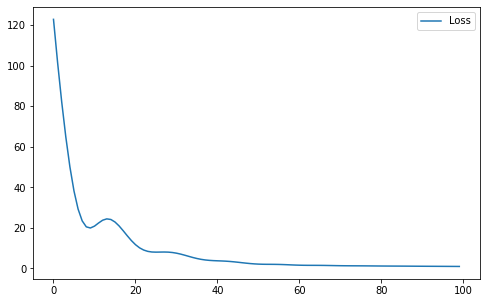

In [8]:
# Plot epoch vs loss

plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

In [9]:
# Initialise model and loss
model = Model(input_dim, output_dim, hidden_dim)

# Loss function and optimizer
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# One forward and backward pass for visualization
optimizer.zero_grad()
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_value.backward()
optimizer.step()

y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(56.3241, grad_fn=<MseLossBackward0>)
tensor(39.9261, grad_fn=<MseLossBackward0>)


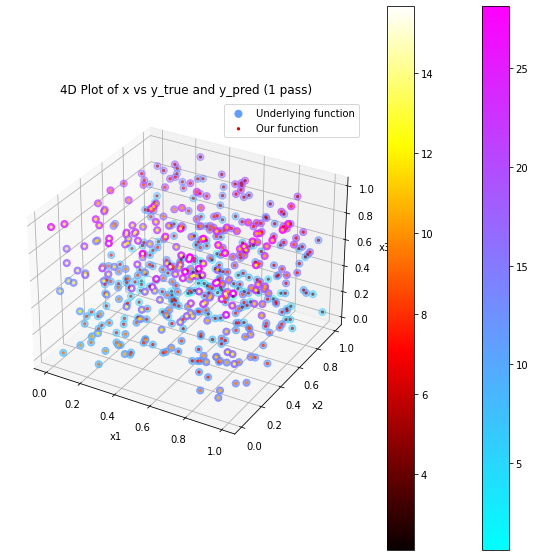

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()